## Actividad 3: Segmentación
Ivanna Maldonado Cervantes - A01736844

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [76]:
#Convertimos el dataset en dataframe
df= pd.read_csv("Boston50_.csv")
df["price"] = df["price"].replace('[\$,]', '', regex=True)
df["price"] = df["price"].astype(float)
df

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_4980/3873186794.py:3: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True)


,Unnamed: 0,id,latitude,longitude,neighbourhood_cleansed,review_scores_location,host_location,property_type,room_type,accommodates,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month,first_review,last_review,estimated_occupancy_l365d,estimated_revenue_l365d
0,0,3781,42.364130,-71.029910,East Boston,4.85,"Massachusetts, United States",Entire rental unit,Entire home/apt,2,...,5.00,4.96,5.00,4.96,4.88,0.21,2015-07-10,2024-08-09,58,7250.0
1,1,5506,42.328440,-71.095810,Roxbury,4.57,"Boston, MA",Entire guest suite,Entire home/apt,2,...,4.89,4.91,4.95,4.89,4.77,0.69,2009-03-21,2025-06-12,78,11076.0
2,2,6695,42.328020,-71.093870,Roxbury,4.53,"Boston, MA",Entire condo,Entire home/apt,4,...,4.82,4.85,4.90,4.94,4.72,0.72,2009-08-06,2025-04-24,66,11286.0
3,3,8789,42.358670,-71.063070,Beacon Hill,4.97,"Boston, MA",Entire rental unit,Entire home/apt,2,...,4.69,4.55,4.93,4.97,4.59,0.22,2014-08-12,2024-05-15,0,0.0
4,4,10811,42.351730,-71.086850,Back Bay,5.00,NaN,Entire rental unit,Entire home/apt,3,...,4.44,4.67,4.56,4.00,4.67,0.08,2016-01-09,2019-07-22,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,4555,1442936143734248350,42.349840,-71.071990,Back Bay,NaN,NaN,Entire rental unit,Entire home/apt,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4556,4556,1442940477243281647,42.347708,-71.073669,Back Bay,NaN,NaN,Entire rental unit,Entire home/apt,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4557,4557,1445146141923468353,42.320754,-71.110194,Jamaica Plain,NaN,"Boston, MA",Private room in rental unit,Private room,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
4558,4558,1445761247286385772,42.376300,-71.030647,East Boston,NaN,NaN,Entire rental unit,Entire home/apt,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4560 non-null   int64  
 1   id                           4560 non-null   int64  
 2   latitude                     4560 non-null   float64
 3   longitude                    4560 non-null   float64
 4   neighbourhood_cleansed       4560 non-null   object 
 5   review_scores_location       4560 non-null   float64
 6   host_location                4560 non-null   object 
 7   property_type                4560 non-null   object 
 8   room_type                    4560 non-null   object 
 9   accommodates                 4560 non-null   int64  
 10  bathrooms                    4560 non-null   float64
 11  bathrooms_text               4560 non-null   object 
 12  bedrooms                     4560 non-null   float64
 13  beds              

In [112]:
df = df.fillna(method="ffill") 

/var/folders/vv/zkrntk9d6sjc4rn30m21zp2w0000gp/T/ipykernel_4980/2164387123.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


### A) K= 3

In [114]:
# Preparamos los datos para clustering
X = df[['review_scores_accuracy', 'number_of_reviews']].values 
X


array([[  5.  ,  26.  ],
       [  4.89, 137.  ],
       [  4.82, 139.  ],
       ...,
       [  5.  ,   0.  ],
       [  5.  ,   0.  ],
       [  5.  ,   0.  ]], shape=(4560, 2))

In [80]:
# Con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [81]:
#Entrenamos el modelo y obtenemos etiquetas predecidas
etiquetas = kmeans.fit_predict(X)
etiquetas

array([0, 1, 1, ..., 0, 0, 0], shape=(4560,), dtype=int32)

In [82]:
#Obtenemos los centroides finales del modelo K-means
centroides1 = kmeans.cluster_centers_
centroides1

array([[  4.72149006,  19.86785804],
       [  4.8460149 , 222.5735568 ],
       [  4.8882    , 664.78      ]])

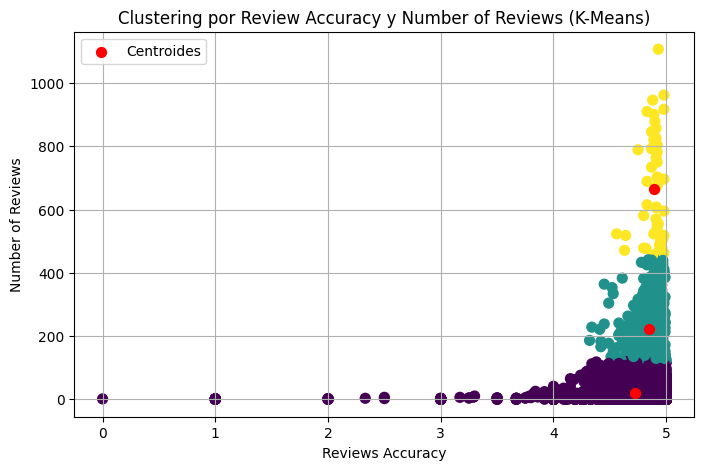

In [83]:
# Para visualizar en 2D, Se utiliza una variable como eje X y la otra variable como eje Y
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides1[:, 0], centroides1[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Review Accuracy y Number of Reviews (K-Means)")
plt.xlabel("Reviews Accuracy")
plt.ylabel("Number of Reviews")
plt.legend()
plt.grid(True)
plt.show()

### B) K= 2

In [84]:
# Seleccionamos columnas numéricas para clustering
X2 = df[['host_listings_count', 'accommodates', 'beds', 'price']].values
X2

array([[  3.,   2.,   1., 125.],
       [ 12.,   2.,   1., 142.],
       [ 12.,   4.,   2., 171.],
       ...,
       [  2.,   1.,   1., 102.],
       [  3.,   8.,   4., 299.],
       [120.,   6.,   4., 173.]], shape=(4560, 4))

In [85]:
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

In [86]:
#Aplicamos K-means con 2 clusters
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [87]:
#Entrenamos el modelo
etiquetas2 = kmeans2.fit_predict(X_scaled2)
etiquetas2

array([0, 0, 0, ..., 0, 0, 0], shape=(4560,), dtype=int32)

In [88]:
 #Obtenemos los centroides finales del modelo K-means
centroides2 = kmeans2.cluster_centers_
centroides2

array([[-1.54156598e-02, -1.31857124e-02, -8.89246009e-03,
        -9.90629196e-02],
       [ 1.54670454e+00,  1.32296648e+00,  8.92210162e-01,
         9.93931293e+00]])

In [89]:
# Reducimos a 2 dimensiones
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled2)
centroides_pca2=pca2.fit_transform(centroides2)

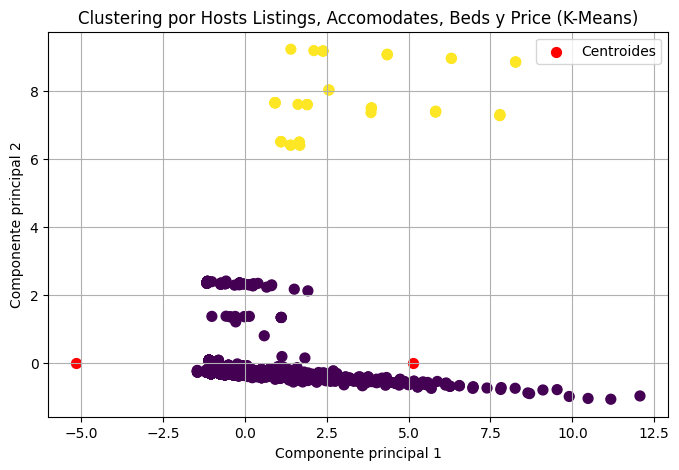

In [90]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=etiquetas2, cmap='viridis', s=50)
plt.scatter(centroides_pca2[:, 0], centroides_pca2[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Hosts Listings, Accomodates, Beds y Price (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

### C) K = 5

In [91]:
X3 = df[['price', 'review_scores_value', 'review_scores_location' ]].values
X3

array([[125.  ,   4.88,   4.85],
       [142.  ,   4.77,   4.57],
       [171.  ,   4.72,   4.53],
       ...,
       [102.  ,   5.  ,   5.  ],
       [299.  ,   5.  ,   5.  ],
       [173.  ,   5.  ,   5.  ]], shape=(4560, 3))

In [92]:
scaler3 = StandardScaler()
X_scaled3 = scaler3.fit_transform(X3)

In [93]:
#Aplicamos K-means con 5 clusters
kmeans3 = KMeans(n_clusters=5, random_state=42)
kmeans3

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [94]:
#Entrenamos el modelo
etiquetas3 = kmeans3.fit_predict(X_scaled3)
etiquetas3

array([4, 4, 4, ..., 4, 4, 4], shape=(4560,), dtype=int32)

In [95]:
 #Obtenemos los centroides finales del modelo K-means
centroides3 = kmeans3.cluster_centers_
centroides3

array([[-9.91636967e-02, -1.24240978e+00,  2.54852579e-01],
       [ 9.93931293e+00,  4.11338330e-03,  4.99009763e-01],
       [-1.02264913e-01, -5.40580379e+00, -4.46333262e+00],
       [-1.08734773e-01, -3.96024023e-01, -1.48008091e+00],
       [-9.72878990e-02,  3.61867208e-01,  3.02562205e-01]])

In [96]:
# Reducimos a 2 dimensiones
pca3 = PCA(n_components=2)
X_pca3 = pca3.fit_transform(X_scaled3)
centroides_pca3=pca3.fit_transform(centroides3)

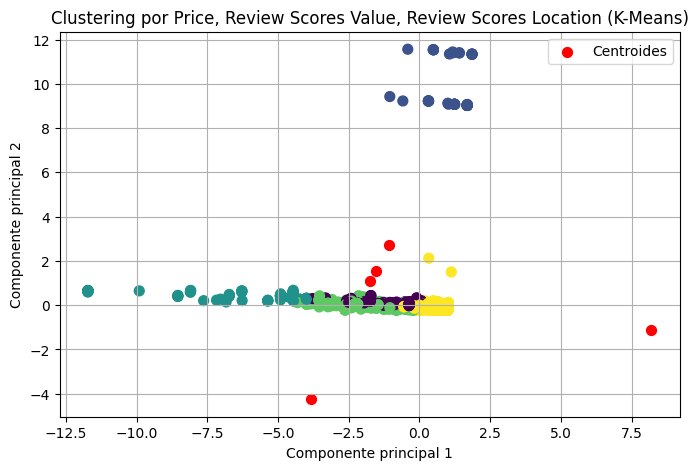

In [97]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=etiquetas3, cmap='viridis', s=50)
plt.scatter(centroides_pca3[:, 0], centroides_pca3[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Price, Review Scores Value, Review Scores Location (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

### D) K = 4

In [98]:
X4 = df[['host_listings_count', 'accommodates', 'beds', 'availability_30' ]].values
X4

array([[  3.,   2.,   1.,   0.],
       [ 12.,   2.,   1.,   4.],
       [ 12.,   4.,   2.,   2.],
       ...,
       [  2.,   1.,   1.,  24.],
       [  3.,   8.,   4.,  24.],
       [120.,   6.,   4.,  29.]], shape=(4560, 4))

In [99]:
scaler4 = StandardScaler()
X_scaled4 = scaler4.fit_transform(X4)

In [100]:
#Aplicamos K-means con 4 clusters
kmeans4 = KMeans(n_clusters=4, random_state=42)
kmeans4

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [101]:
#Entrenamos el modelo
etiquetas4 = kmeans4.fit_predict(X_scaled4)
etiquetas4

array([2, 2, 2, ..., 0, 1, 0], shape=(4560,), dtype=int32)

In [102]:
 #Obtenemos los centroides finales del modelo K-means
centroides4 = kmeans4.cluster_centers_
centroides4

array([[-0.27454029, -0.25828191, -0.24230946,  1.16773302],
       [-0.24160097,  2.14310916,  2.18831451,  0.09105098],
       [-0.31235314, -0.20676076, -0.21653751, -0.70556415],
       [ 3.24706244, -0.34184629, -0.40362275, -0.66270866]])

In [103]:
# Reducimos a 2 dimensiones
pca4 = PCA(n_components=2)
X_pca4 = pca4.fit_transform(X_scaled4)
centroides_pca4=pca4.fit_transform(centroides4)

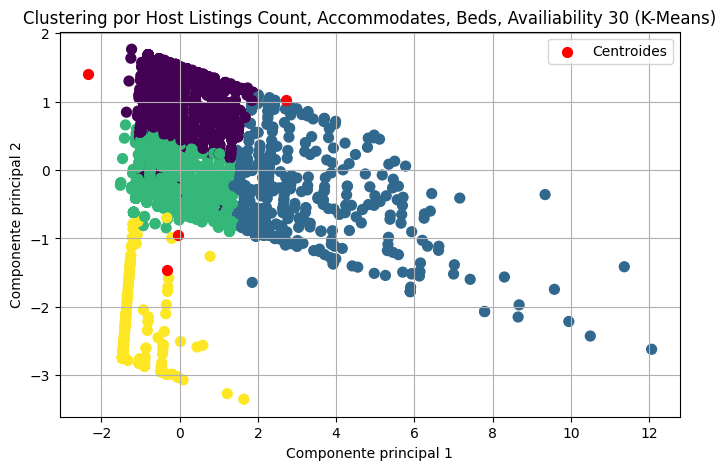

In [104]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=etiquetas4, cmap='viridis', s=50)
plt.scatter(centroides_pca4[:, 0], centroides_pca4[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Host Listings Count, Accommodates, Beds, Availiability 30 (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()

### E) K = 10

In [105]:
X5 = df[['reviews_per_month', 'host_listings_count', 'review_scores_cleanliness', 'review_scores_rating', 'minimum_nights' ]].values
X5

array([[  0.21,   3.  ,   4.96,   4.96,  29.  ],
       [  0.69,  12.  ,   4.91,   4.82,   3.  ],
       [  0.72,  12.  ,   4.85,   4.81,   3.  ],
       ...,
       [  1.  ,   2.  ,   5.  ,   5.  ,   1.  ],
       [  1.  ,   3.  ,   5.  ,   5.  ,   1.  ],
       [  1.  , 120.  ,   5.  ,   5.  ,  91.  ]], shape=(4560, 5))

In [106]:
scaler5 = StandardScaler()
X_scaled5 = scaler5.fit_transform(X5)

In [107]:
#Aplicamos K-means con 10 clusters
kmeans5 = KMeans(n_clusters=10, random_state=42)
kmeans5

,n_clusters,10
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [108]:
#Entrenamos el modelo
etiquetas5 = kmeans5.fit_predict(X_scaled5)
etiquetas5

array([5, 5, 5, ..., 5, 5, 0], shape=(4560,), dtype=int32)

In [109]:
 #Obtenemos los centroides finales del modelo K-means
centroides5 = kmeans5.cluster_centers_
centroides5

array([[-0.52057666, -0.28359497,  0.12388551,  0.22946998,  1.88256511],
       [-0.54227121,  0.15533085, -2.59962887, -3.72525315, -0.06652721],
       [-0.64643339,  3.23467178, -1.52846082, -1.21759742,  0.13723568],
       [ 3.83028487, -0.32966245,  0.19139929,  0.15604229, -0.47675922],
       [-0.72544397,  1.32154462, -7.3913782 , -6.57112144,  0.39045363],
       [-0.39642089, -0.31409361,  0.33968681,  0.32894145, -0.30312565],
       [-0.17419615,  3.08017827,  0.35664885,  0.28667115,  0.03170174],
       [-0.62832283, -0.3500538 , -0.01888309,  0.33113081,  6.77897064],
       [ 1.03070976, -0.32622369,  0.25113983,  0.19946978, -0.61293191],
       [-0.41782561, -0.30927208, -0.95631275, -0.86295866, -0.16410065]])

In [110]:
# Reducimos a 2 dimensiones
pca5 = PCA(n_components=2)
X_pca5 = pca5.fit_transform(X_scaled5)
centroides_pca5=pca5.fit_transform(centroides5)

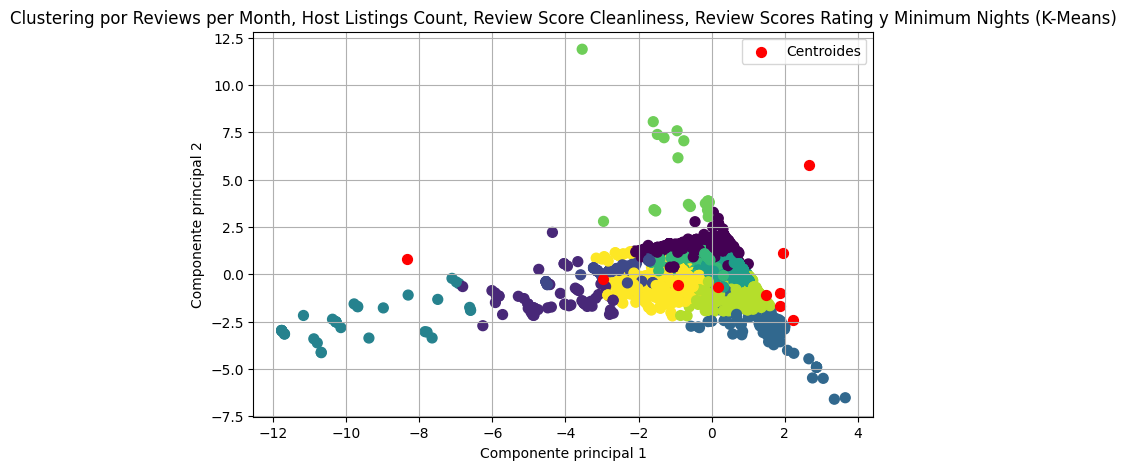

In [111]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca5[:, 0], X_pca5[:, 1], c=etiquetas5, cmap='viridis', s=50)
plt.scatter(centroides_pca5[:, 0], centroides_pca5[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("Clustering por Reviews per Month, Host Listings Count, Review Score Cleanliness, Review Scores Rating y Minimum Nights (K-Means)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()